In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN

In [63]:
# Call dataset
census_data = pd.read_csv("ACS_Full_Features.csv")

In [64]:
# Check data
census_data.head()

,NAME,Median Age by Sex,Total Population,White,Black/African American,American Indian/Alaskan,Asian,Hawaiian/Pacific Islander,Some Other Race,Two or More Races,...,Black/African American Population (%),Asian Population (%),Hawaiian/Pacific Islander Population (%),American Indian/Alaskan Population (%),Some Other Race Population (%),Two or More Races Population (%),Disabled Population (%),Disabled Population Category,state,county
0,"Autauga County, Alabama",39.0,58761,43747,11496,59,658,0,321,2480,...,19.563997,1.119790,0.000000,0.100407,0.546281,4.220486,16.039550,Medium,1,1
1,"Baldwin County, Alabama",43.7,233420,195998,19445,848,2046,31,4414,10638,...,8.330477,0.876532,0.013281,0.363294,1.891012,4.557450,13.656927,Low,1,3
2,"Barbour County, Alabama",40.6,24877,11309,11668,74,126,3,1088,609,...,46.902762,0.506492,0.012059,0.297464,4.373518,2.448044,15.958516,Medium,1,5
3,"Bibb County, Alabama",40.3,22251,16872,4603,21,69,0,108,578,...,20.686711,0.310098,0.000000,0.094378,0.485371,2.597636,18.412656,Medium,1,7
4,"Blount County, Alabama",40.8,59077,53941,729,227,100,117,1859,2104,...,1.233983,0.169271,0.198047,0.384244,3.146741,3.561454,16.839041,Medium,1,9


In [65]:
# Next, separate labels from the data, along with qualitative values
# Copying this code from the PCA file

# Quantitative dataset
cluster_census = census_data.copy()
cluster_census = cluster_census.drop(columns = ['NAME', 'Income Category', 'Poverty Rate Classification', 'Degree Attainment', 'POC Population Category', 'Disabled Population Category', 'state', 'county'])
cluster_census = cluster_census.drop(columns = ['White', 'Black/African American', 'American Indian/Alaskan', 'Asian', 'Hawaiian/Pacific Islander', 'Some Other Race', 'Two or More Races', 'Total Degrees', 'Disabled Population'])

In [66]:
# Check
cluster_census.head()

,Median Age by Sex,Total Population,Male,Female,Never Married,Now Married,Widowed,Divorced,"12th Grade, No Diploma",High School Diploma,...,Degree Percentage (%),POC Population (%),White Population (%),Black/African American Population (%),Asian Population (%),Hawaiian/Pacific Islander Population (%),American Indian/Alaskan Population (%),Some Other Race Population (%),Two or More Races Population (%),Disabled Population (%)
0,39.0,58761,28663,30098,31283,19408,3274,5829,704,10001,...,20.215789,25.550961,74.449039,19.563997,1.119790,0.000000,0.100407,0.546281,4.220486,16.039550
1,43.7,233420,114077,119343,123882,76904,12778,22974,3299,38059,...,23.299203,16.018764,83.967955,8.330477,0.876532,0.013281,0.363294,1.891012,4.557450,13.656927
2,40.6,24877,12973,11904,14573,7202,1499,2907,488,5136,...,8.441532,54.528279,45.459662,46.902762,0.506492,0.012059,0.297464,4.373518,2.448044,15.958516
3,40.3,22251,11897,10354,12287,6598,1482,2442,729,5261,...,7.815379,24.174194,75.825806,20.686711,0.310098,0.000000,0.094378,0.485371,2.597636,18.412656
4,40.8,59077,29864,29213,30951,18142,3945,5482,1029,11248,...,10.185013,8.495692,91.306261,1.233983,0.169271,0.198047,0.384244,3.146741,3.561454,16.839041


In [67]:
# Label/Qualitative Dataset
label_census = census_data.copy()
label_census = label_census.loc[:, ['NAME', 'Income Category', 'Poverty Rate Classification', 'Degree Attainment', 'POC Population Category', 'Disabled Population Category', 'state', 'county']]

In [68]:
label_census.head()

,NAME,Income Category,Poverty Rate Classification,Degree Attainment,POC Population Category,Disabled Population Category,state,county
0,"Autauga County, Alabama",Medium,Low Poverty,Medium Degree Attainment,High,Medium,1,1
1,"Baldwin County, Alabama",High,Low Poverty,Medium Degree Attainment,Medium,Low,1,3
2,"Barbour County, Alabama",Low,High Poverty,Low Degree Attainment,High,Medium,1,5
3,"Bibb County, Alabama",Low,Low Poverty,Low Degree Attainment,High,Medium,1,7
4,"Blount County, Alabama",Medium,Low Poverty,Low Degree Attainment,Low,Medium,1,9


In [69]:
# Check quanitative only
cluster_census.dtypes

,0
Median Age by Sex,float64
Total Population,int64
Male,int64
Female,int64
Never Married,int64
Now Married,int64
Widowed,int64
Divorced,int64
"12th Grade, No Diploma",int64
High School Diploma,int64


In [70]:
# Designate X and y
X = cluster_census
y = label_census

In [71]:
# Train/test split the data in a 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [72]:
# Initialize standard scaler
standardizer = StandardScaler()

In [73]:
# Standardize testing data
X_train = standardizer.fit_transform(X_train)
X_test = standardizer.fit_transform(X_test)

In [74]:
# show standardized data
showcase = X_train[:3]
print('Standardized data showcase:', str(showcase))

Standardized data showcase: [[-0.21556251 -0.2791233  -0.27854125 -0.27959288 -0.2765133  -0.27987815
  -0.26019028 -0.28970146 -0.24066926 -0.3058393  -0.28341774 -0.28447992
  -0.27313972 -0.2683707  -0.27140895 -0.25503773 -0.23491167 -0.24888312
  -0.83287088 -0.21552583  0.33317222  0.00654147  0.72597633  1.34893246
   0.47955418  0.94337415 -1.05463695 -0.39722361 -1.04681709 -0.86800079
   1.17680922 -0.55351831  0.2439648  -0.24002063 -0.52196791 -0.19613578
  -0.11365256  0.01282453  1.04170986  1.04650638  0.96133405]
 [ 0.39873244 -0.30860432 -0.30829007 -0.30880153 -0.30409318 -0.30416648
  -0.3280779  -0.33151047 -0.25373987 -0.33559602 -0.38834557 -0.32275152
  -0.3076667  -0.31211423 -0.27349358 -0.27565241 -0.25005617 -0.26862531
  -0.22300415 -0.29930236 -0.53917607  0.21929633  0.25783102 -0.15323017
  -0.05437999  0.32533876 -0.48024811  0.22263336  0.04696126  0.06714339
  -0.53585917 -0.05986312 -0.7723658   0.73188111 -0.54972259 -0.46923518
   1.37140942 -0.1903

In [75]:
# Initialize PCA, for n_components = 3
pca = PCA(n_components= 3)

# Perform PCA on dataset
X_train3 = pca.fit_transform(X_train)
X_test3 = pca.transform(X_test)

In [76]:
showcase3 = X_train3[:3]
print('Standardized data showcase:', str(showcase3))

Standardized data showcase: [[-1.74812206  2.34684239  0.2872991 ]
 [-1.38598405 -0.88900312  0.67314474]
 [-1.0779867  -1.52695976  0.98795505]]


In [77]:
# Show total variance for 3D PCA
explained_variance = pca.explained_variance_ratio_
explained_variance_sum = np.cumsum(explained_variance)

print("Explained Variance sum percentage for n_components = 3:", explained_variance_sum)

Explained Variance sum percentage for n_components = 3: [0.45252156 0.63620195 0.71415686]


Now, to graph each Kmeans value that's been chosen: 2, 3, 4, 5, 6, and 7. They're graphed individually so each grapoh can be saved to display the html on the website.

In [96]:
# Initialize a list for silhouette scores & clusters for later use.
iterations = [2, 3, 4, 5, 6, 7]
silhouette_scores = []

In [114]:
# Start with 2
i = 2
kmeans = KMeans(n_clusters=i)
cluster_labels = kmeans.fit_predict(X_train3)
score = silhouette_score(X_train3, cluster_labels)
silhouette_scores.append(score)

fig1 = px.scatter_3d(
    x=X_train3[:, 0],
    y=X_train3[:, 1],
    z=X_train3[:, 2],
    color=cluster_labels,
    title=f"K-Means Clustering with N = {i}",
    labels={'color': 'Cluster Label', 'x': 'PC 1', 'y':'PC 2', 'z': 'PC 3'}
)

centroids = kmeans.cluster_centers_
fig1.add_trace(
    go.Scatter3d(
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=centroids[:, 2],
        mode='markers',
        marker=dict(size=10, color='red', symbol='circle'),
        name='Centroids'
    )
)

fig1.show()

In [115]:
i = 3
kmeans = KMeans(n_clusters=i)
cluster_labels = kmeans.fit_predict(X_train3)
score = silhouette_score(X_train3, cluster_labels)
silhouette_scores.append(score)

fig2 = px.scatter_3d(
    x=X_train3[:, 0],
    y=X_train3[:, 1],
    z=X_train3[:, 2],
    color=cluster_labels,
    title=f"K-Means Clustering with N = {i}",
    labels={'color': 'Cluster Label', 'x': 'PC 1', 'y':'PC 2', 'z': 'PC 3'}
)

centroids = kmeans.cluster_centers_
fig2.add_trace(
    go.Scatter3d(
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=centroids[:, 2],
        mode='markers',
        marker=dict(size=10, color='red', symbol='circle'),
        name='Centroids'
    )
)

fig2.show()

In [116]:
i = 4
kmeans = KMeans(n_clusters=i)
cluster_labels = kmeans.fit_predict(X_train3)
score = silhouette_score(X_train3, cluster_labels)
silhouette_scores.append(score)

fig3 = px.scatter_3d(
    x=X_train3[:, 0],
    y=X_train3[:, 1],
    z=X_train3[:, 2],
    color=cluster_labels,
    title=f"K-Means Clustering with N = {i}",
    labels={'color': 'Cluster Label', 'x': 'PC 1', 'y':'PC 2', 'z': 'PC 3'}
)

centroids = kmeans.cluster_centers_
fig3.add_trace(
    go.Scatter3d(
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=centroids[:, 2],
        mode='markers',
        marker=dict(size=10, color='red', symbol='circle'),
        name='Centroids'
    )
)

fig3.show()

In [112]:
i = 5
kmeans = KMeans(n_clusters=i)
cluster_labels = kmeans.fit_predict(X_train3)
score = silhouette_score(X_train3, cluster_labels)
silhouette_scores.append(score)

fig4 = px.scatter_3d(
    x=X_train3[:, 0],
    y=X_train3[:, 1],
    z=X_train3[:, 2],
    color=cluster_labels,
    title=f"K-Means Clustering with N = {i}",
    labels={'color': 'Cluster Label', 'x': 'PC 1', 'y':'PC 2', 'z': 'PC 3'}
)

centroids = kmeans.cluster_centers_
fig4.add_trace(
    go.Scatter3d(
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=centroids[:, 2],
        mode='markers',
        marker=dict(size=10, color='red', symbol='circle'),
        name='Centroids'
    )
)

fig4.show()

In [117]:
i = 6
kmeans = KMeans(n_clusters=i)
cluster_labels = kmeans.fit_predict(X_train3)
score = silhouette_score(X_train3, cluster_labels)
silhouette_scores.append(score)

fig5 = px.scatter_3d(
    x=X_train3[:, 0],
    y=X_train3[:, 1],
    z=X_train3[:, 2],
    color=cluster_labels,
    title=f"K-Means Clustering with N = {i}",
    labels={'color': 'Cluster Label', 'x': 'PC 1', 'y':'PC 2', 'z': 'PC 3'}
)

centroids = kmeans.cluster_centers_
fig5.add_trace(
    go.Scatter3d(
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=centroids[:, 2],
        mode='markers',
        marker=dict(size=10, color='red', symbol='circle'),
        name='Centroids'
    )
)

fig5.show()

In [119]:
i = 7
kmeans = KMeans(n_clusters=i)
cluster_labels = kmeans.fit_predict(X_train3)
score = silhouette_score(X_train3, cluster_labels)
silhouette_scores.append(score)

fig6 = px.scatter_3d(
    x=X_train3[:, 0],
    y=X_train3[:, 1],
    z=X_train3[:, 2],
    color=cluster_labels,
    title=f"K-Means Clustering with N = {i}",
    labels={'color': 'Cluster Label', 'x': 'PC 1', 'y':'PC 2', 'z': 'PC 3'}
)

centroids = kmeans.cluster_centers_
fig6.add_trace(
    go.Scatter3d(
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=centroids[:, 2],
        mode='markers',
        marker=dict(size=10, color='red', symbol='circle'),
        name='Centroids'
    )
)

fig6.show()

In [120]:
# And now to print the silhouette scores for all:
print(silhouette_scores)

[0.7696923573343822, 0.7696923573343822, 0.7696923573343822, 0.7696923573343822, 0.7696923573343822, 0.7696923573343822, 0.514906044823582, 0.37735402039375626, 0.34141591568141755, 0.39550180048369216, 0.3834182334874257, 0.33956626251028416, 0.33881517399786976, 0.3918598240512716, 0.3662105143119757, 0.7696923573343822, 0.34141591568141755, 0.40367560897302773, 0.36568392417210827, 0.3433230668544021, 0.34811032645641465]


Next, to make the silhouette plots: code adapted from this example on scikit website: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

For n_clusters = 2, the average silhouette_score is: 0.7697
For n_clusters = 3, the average silhouette_score is: 0.3474
For n_clusters = 4, the average silhouette_score is: 0.3774
For n_clusters = 5, the average silhouette_score is: 0.4129
For n_clusters = 6, the average silhouette_score is: 0.3441
For n_clusters = 7, the average silhouette_score is: 0.3392


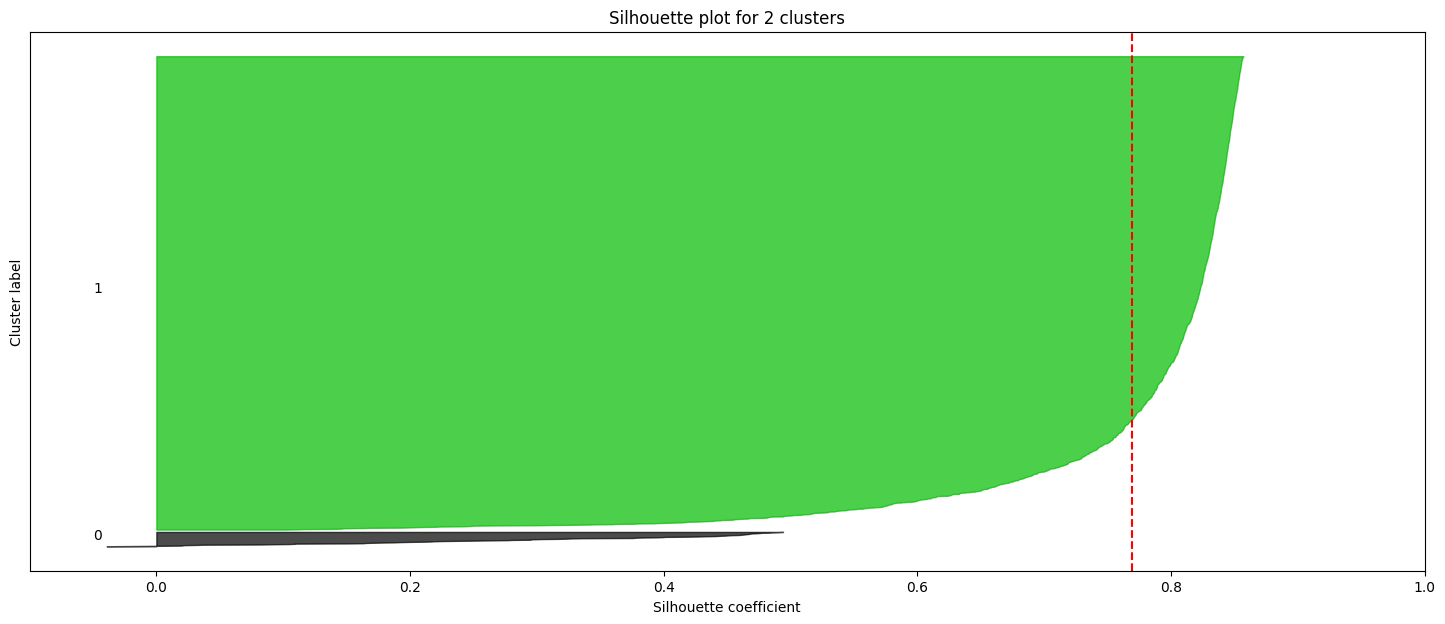

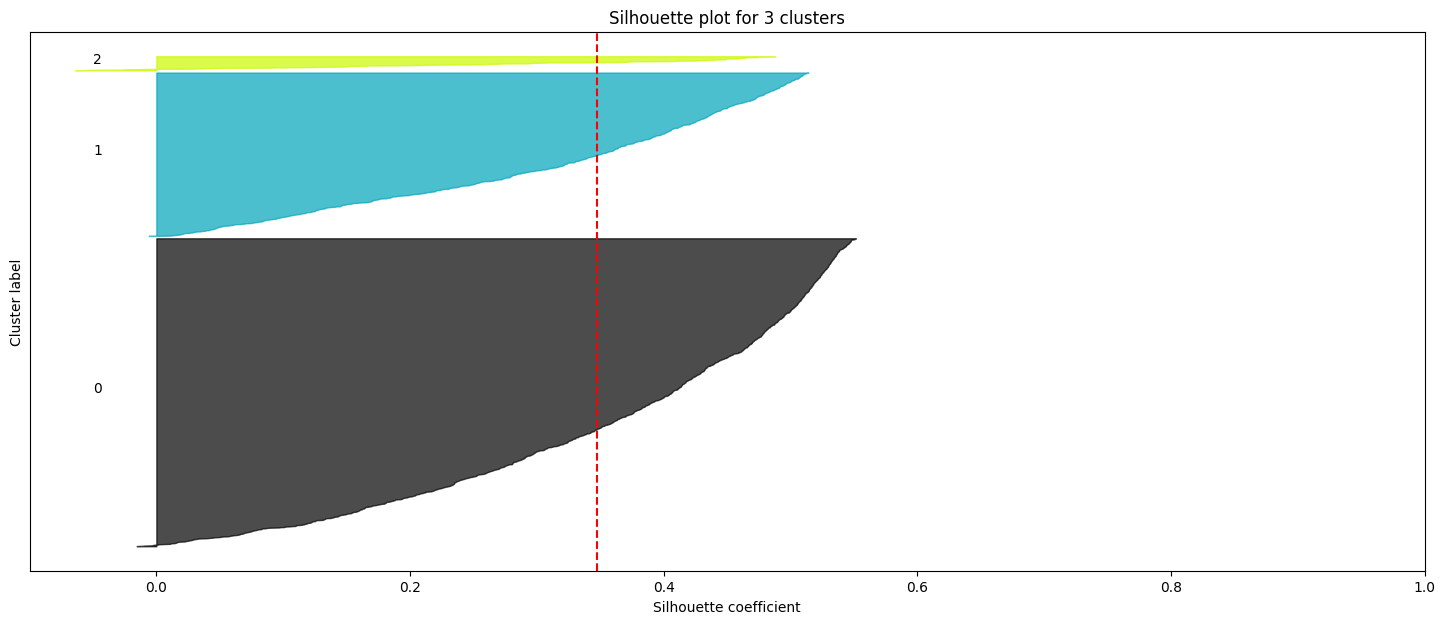

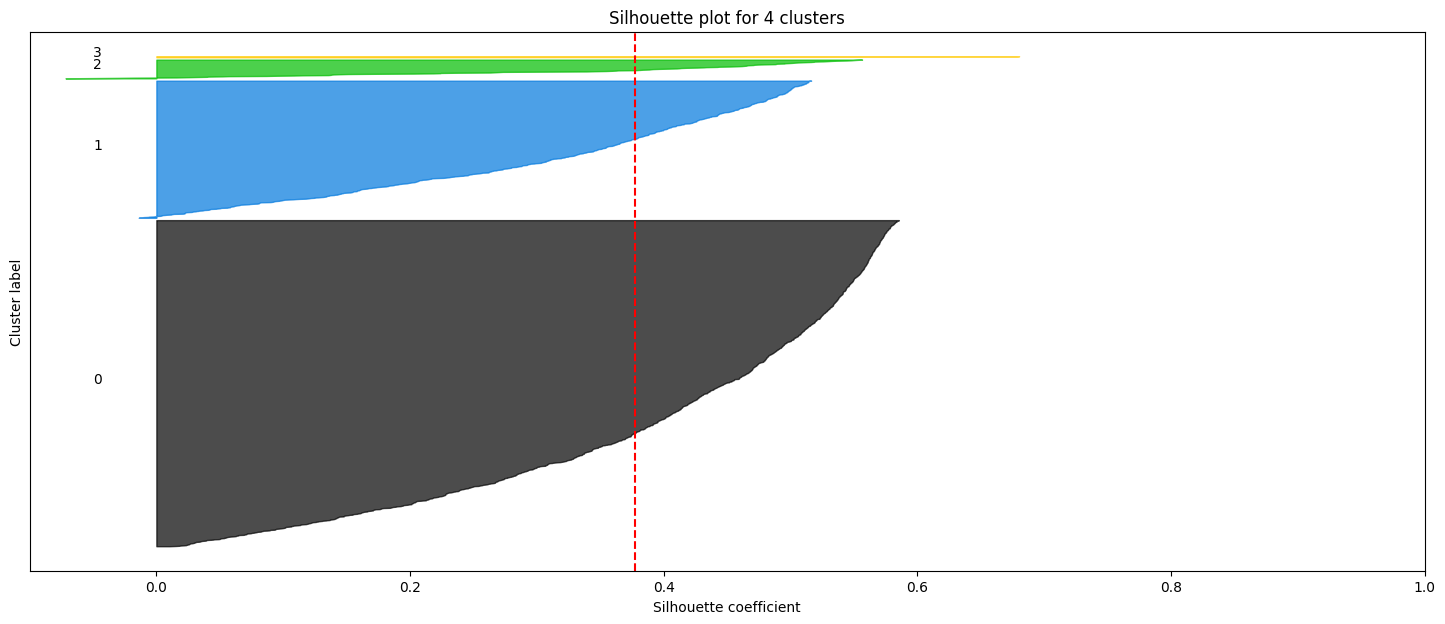

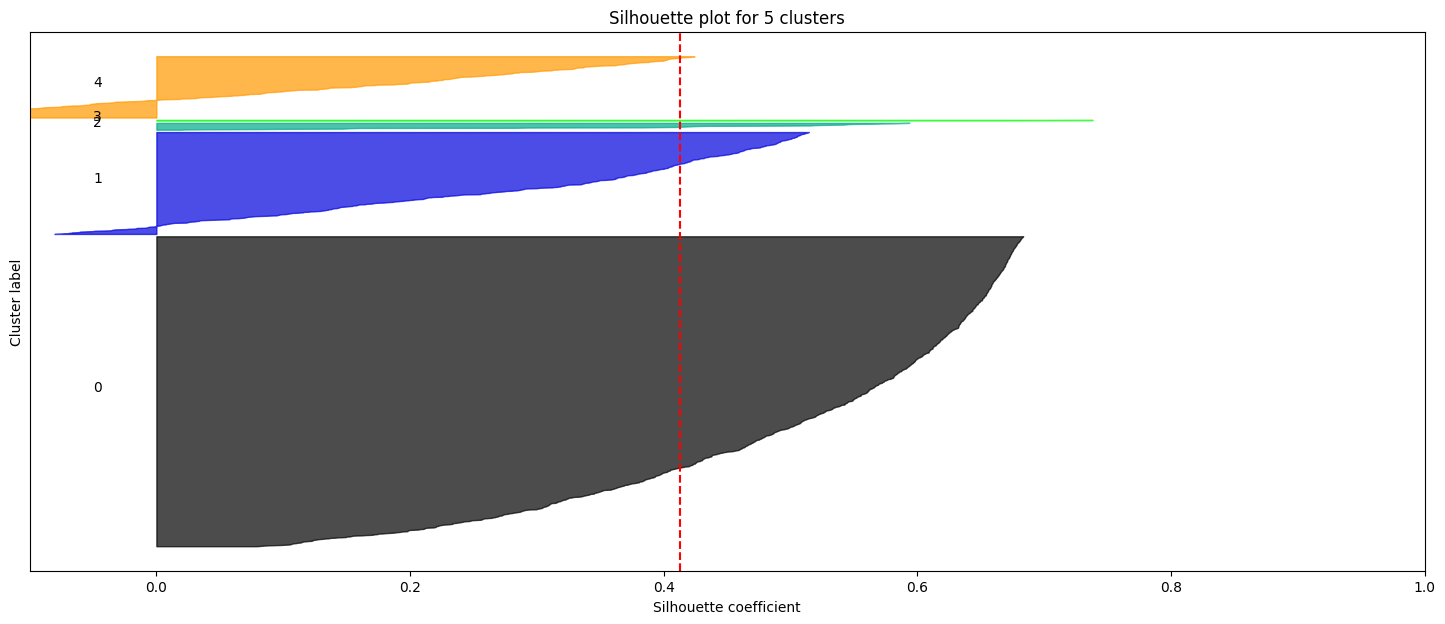

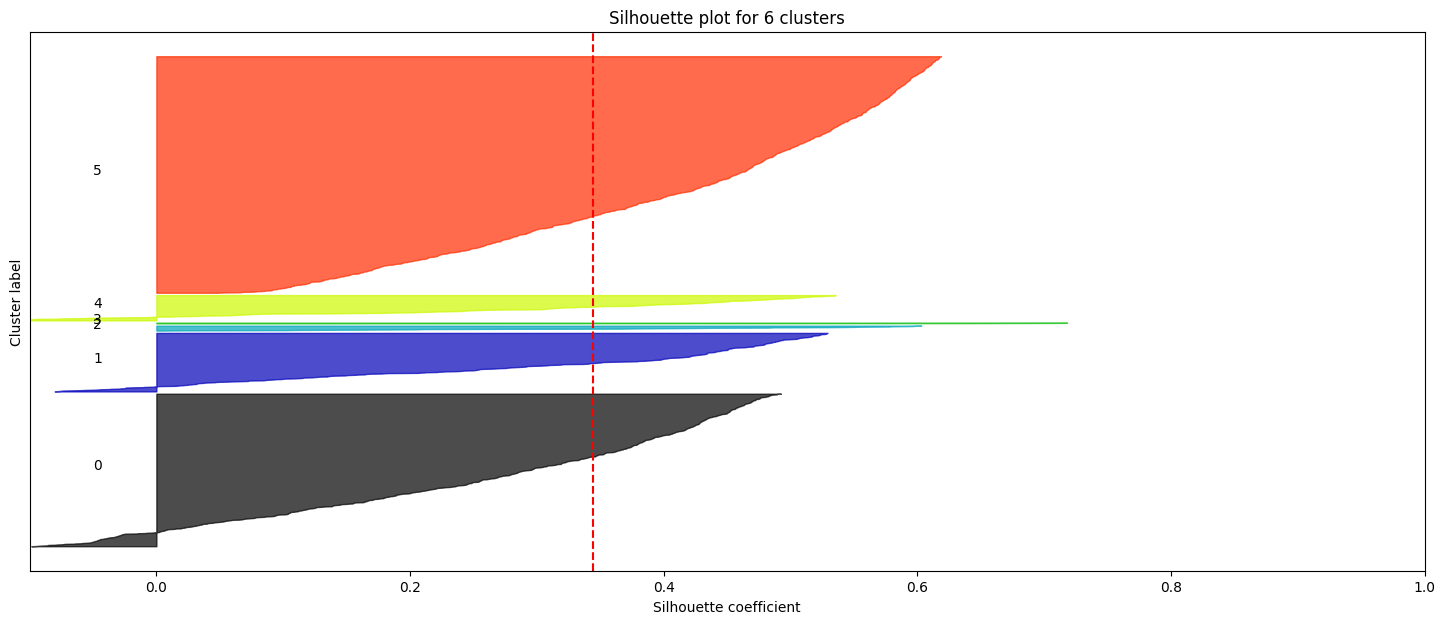

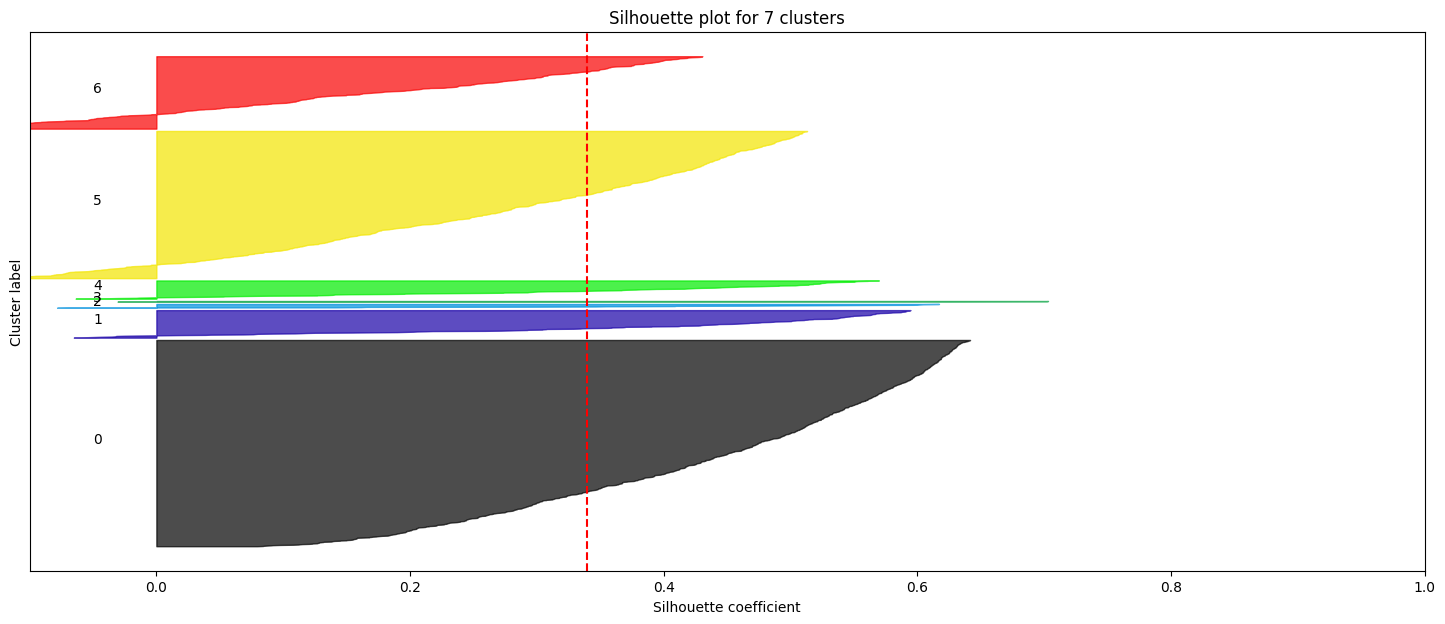

In [127]:
# Silhouette plot implementation

for n_clusters in iterations:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Fit KMeans with current n_clusters value
    kmeans = KMeans(n_clusters=n_clusters, random_state=801) # random state for reproduceability
    cluster_labels = kmeans.fit_predict(X_train3)

    # Calculate silhouette score, print it with each plot for comparison
    silhouette_avg = silhouette_score(X_train3, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg:.4f}")

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train3, cluster_labels)

    # Plot the silhouette scores for each sample
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate silhouette scores for cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute new y_lower for next plot
        y_lower = y_upper + 10  # 10 for space between clusters

    # Add vertical line for average silhouette score, the higher the better
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Next, add axis labels

    ax1.set_title(f"Silhouette plot for {n_clusters} clusters")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # Clear y-axis labels and set limits
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7696923573343822
For n_clusters = 3 The average silhouette_score is : 0.34738848586391097
For n_clusters = 4 The average silhouette_score is : 0.37735402039375626
For n_clusters = 5 The average silhouette_score is : 0.41288562598092327
For n_clusters = 6 The average silhouette_score is : 0.34412081795237565
For n_clusters = 7 The average silhouette_score is : 0.33918662891788004


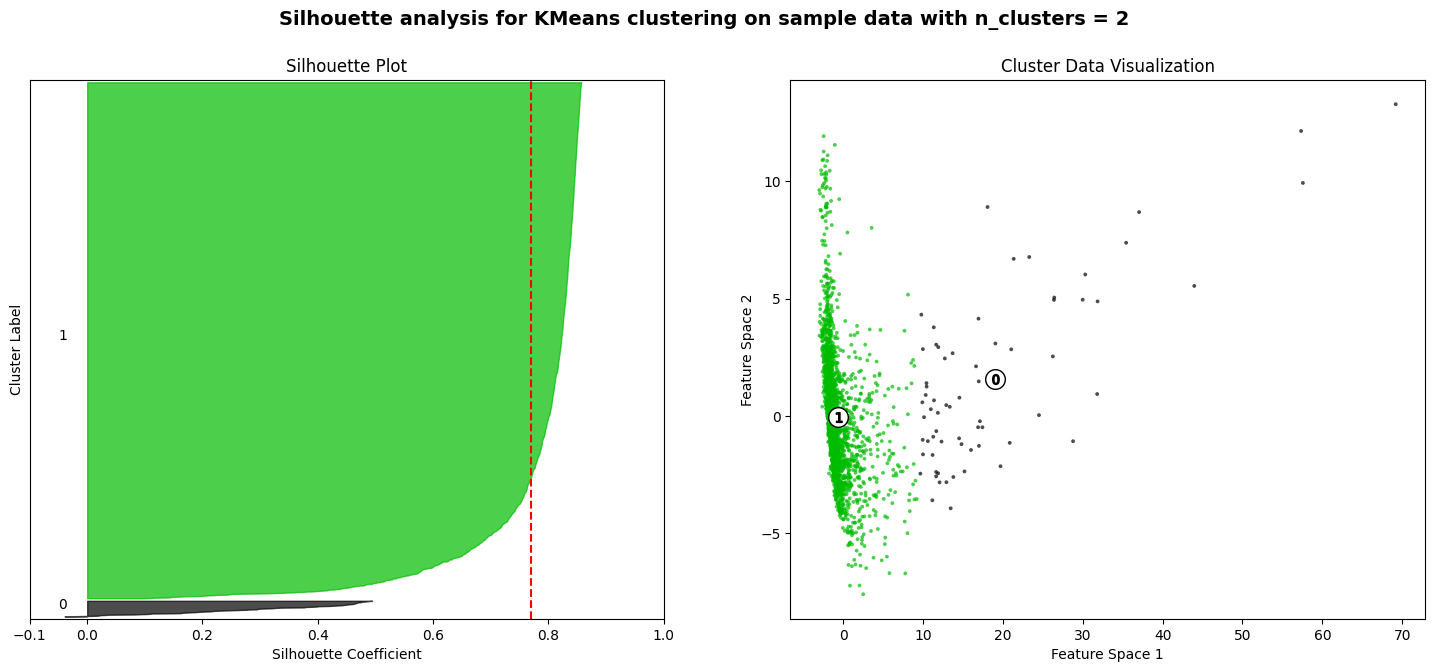

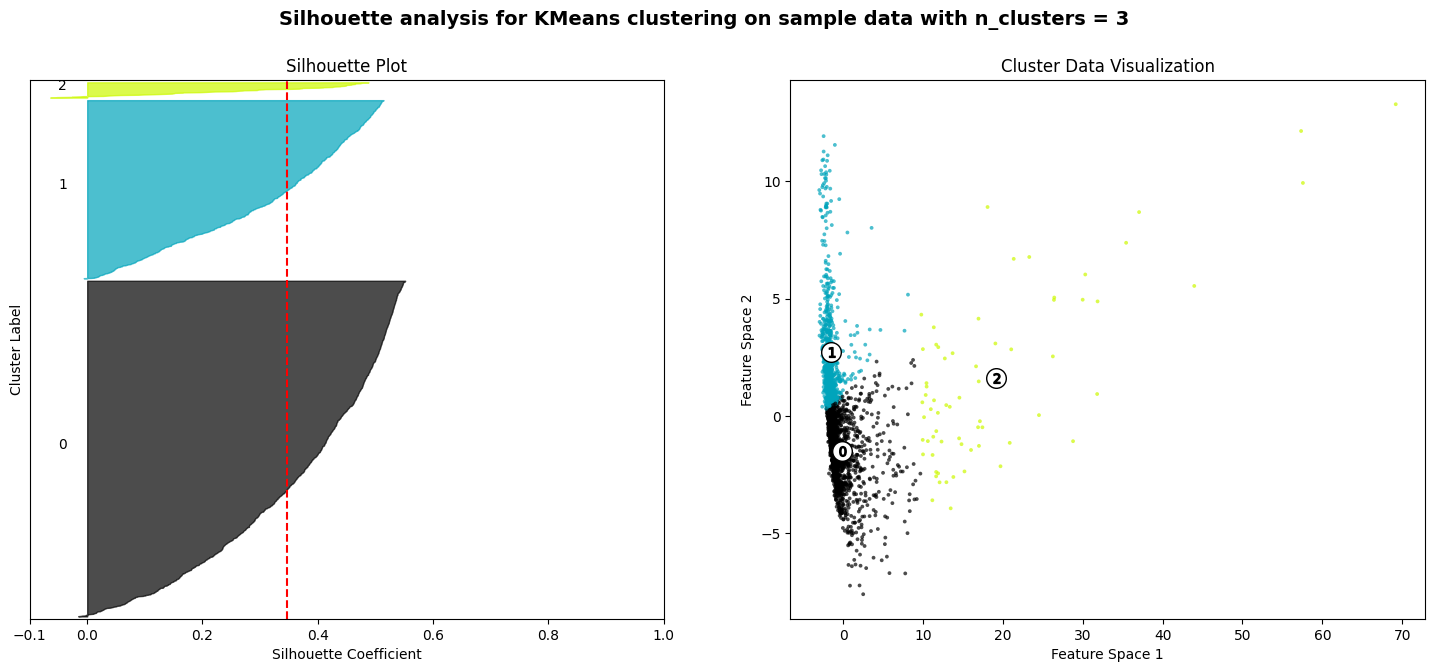

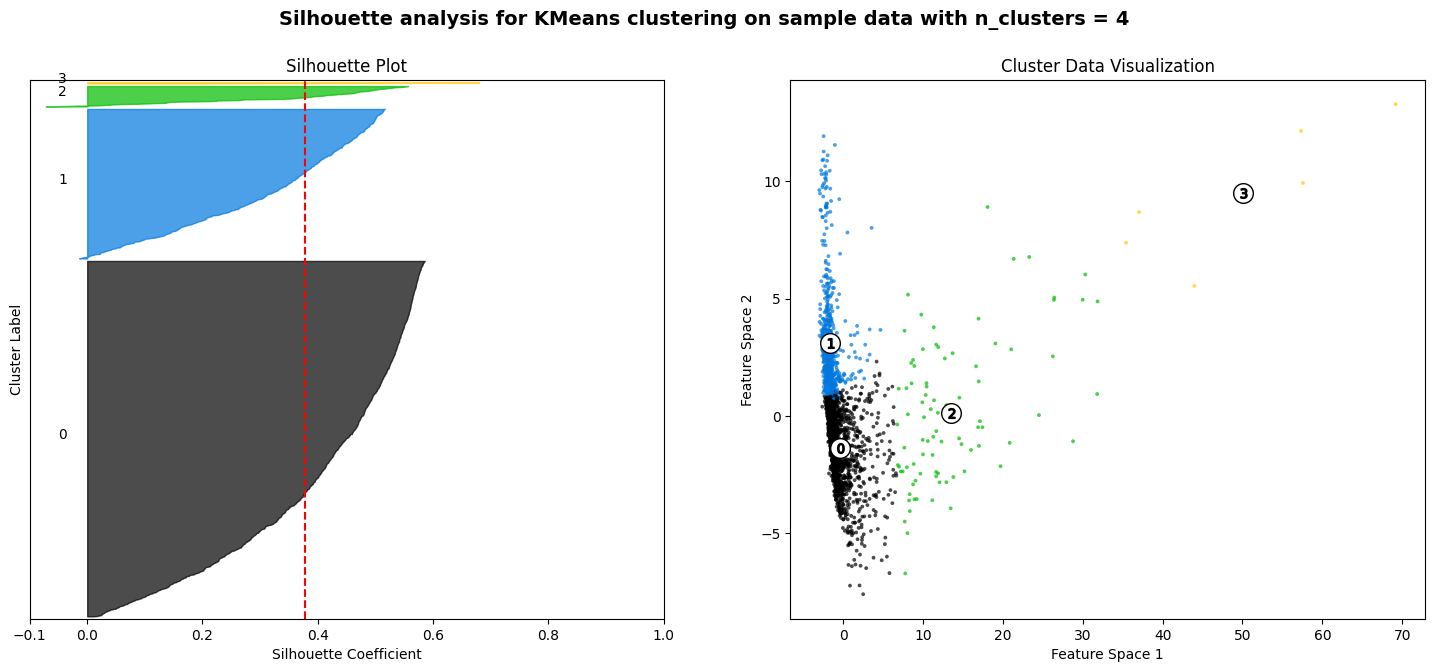

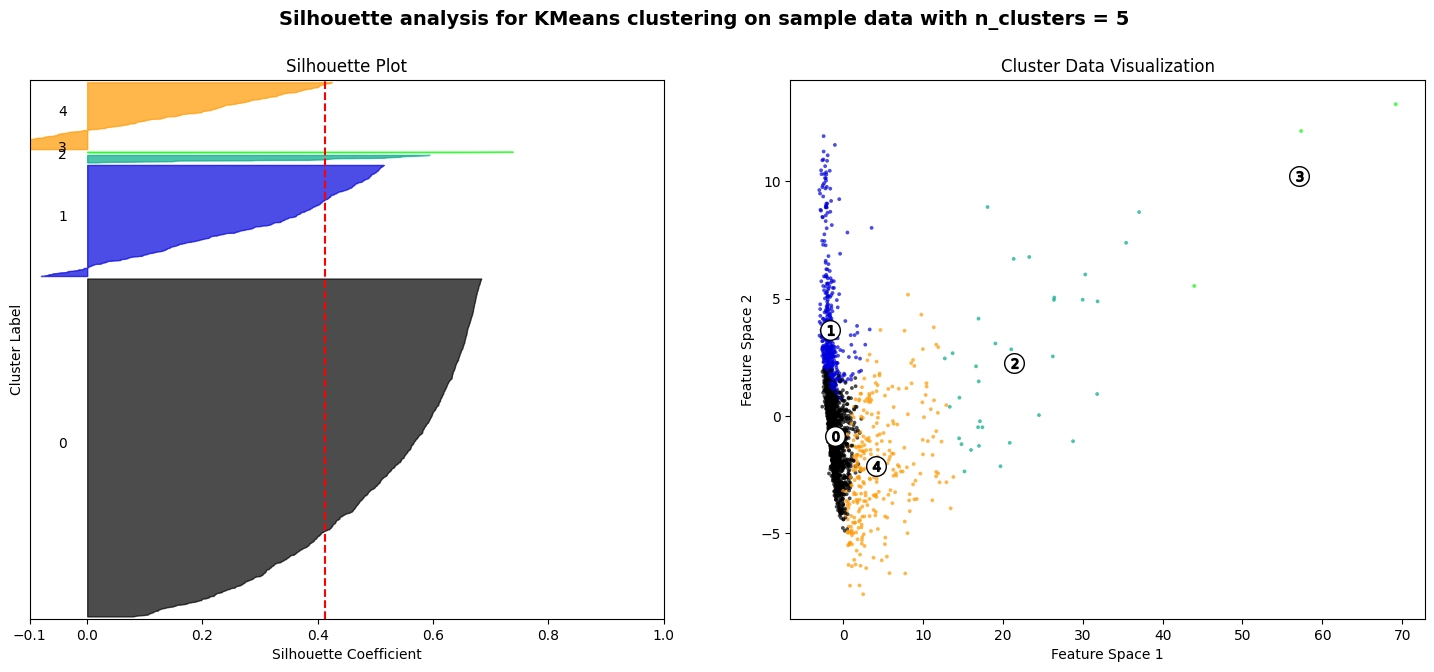

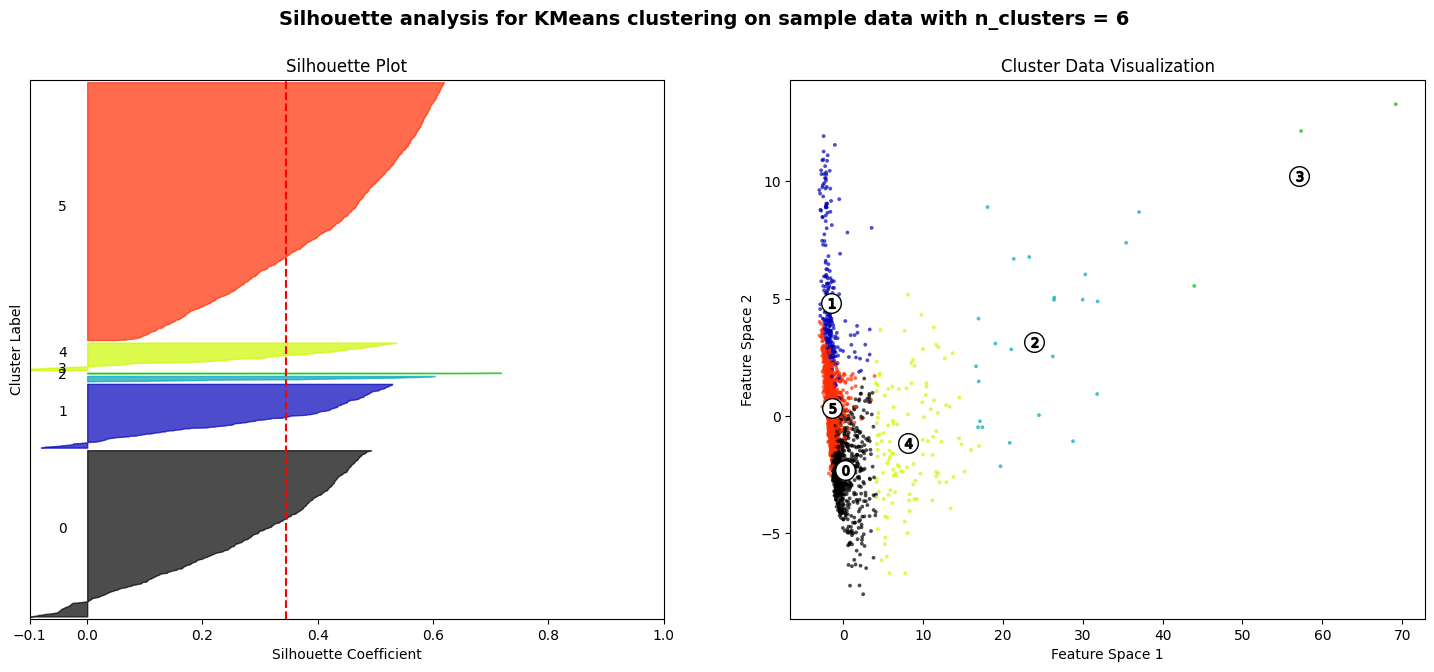

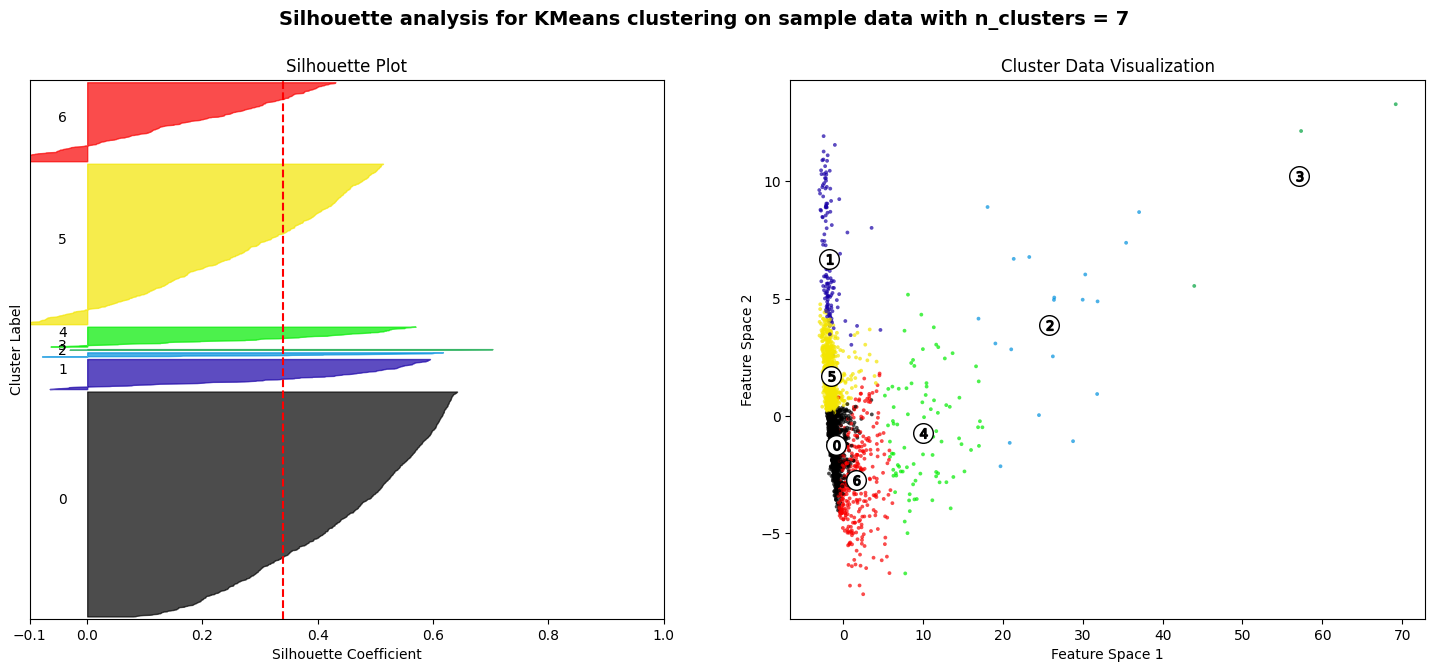

In [126]:
# Next, to add the cluster plot with labels, also adapted from the same code

for n_clusters in iterations:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train3) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value
    clusterer = KMeans(n_clusters=n_clusters, random_state = 801) # added the random_state for reproducibility, keeps the results consistent for the website
    cluster_labels = clusterer.fit_predict(X_train3)

    # The silhouette_score average is calculated here
    silhouette_avg = silhouette_score(X_train3, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample, compile them in a variable
    sample_silhouette_values = silhouette_samples(X_train3, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette Coefficient")
    ax1.set_ylabel("Cluster Label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_train3[:, 0], X_train3[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the Centroids
    centers = clusterer.cluster_centers_
    # Draw white circles for centroid labels, easier visual
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )



    for i, c in enumerate(centers): # Initalize the graph settings here
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Cluster Data Visualization") # Set axis labels for cluster plot
    ax2.set_xlabel("Feature Space 1")
    ax2.set_ylabel("Feature Space 2")

    plt.suptitle( # This adds the overall title for both plots
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Based on this, the top 3 number of clusters are: 4, 6, and 7. This is based on the fact that every cluster in those plots is above the average score, and has less of a 'wide' distribution than some of the earlier plots. The clusters are also reasonably separated based on the graphs to the right, although there is some spread, it's largely due to the shape and behavior of the PCA-reduced data. The overall silhouette score for all of them is rather poor, being below 0.5, but that might be due to the data as well.

In [93]:
# Now to compare clusters to original labels
# In this case, the above value of 3 for clusters will be used.

kmeans = KMeans(n_clusters = 5)
cluster_labels = kmeans.fit_predict(X_train3)

original_labels = y_train['Income Category']

results = pd.DataFrame({'PCA1': X_train3[:, 0],        # First PCA component
    'PCA2': X_train3[:, 1],        # Second PCA component
    'PCA3': X_train3[:, 2],        # Third PCA component
    'Original Labels': original_labels,  # Original labels from the dataset
    'Cluster Labels': cluster_labels

  })

fig_o = px.scatter_3d(
      results,
      x='PCA1',
      y='PCA2',
      z='PCA3',
      color = 'Original Labels',
      title = 'Original Label PCA Plot',
      labels = {'Original Labels': 'Original Labels'}
  )
fig_o.show()

When compared to the n = 5 plot, there's a very similar distribution as the centroids. This implies a level of success in the KMeans clustering when it comes to matching the label values of the original data, even unsupervised. That may paritally be due to the standardization/PCA reduction, but that's to be expected, because that's why it was done.

Overall, the higher N_cluster values seem to have more success in predicting the data labels. This is likely due to the high dimensionality of the original data. There's some variation among the silhouette plots, and the cluster_5 plot had a lower score, which is surpising compared to the number of original labels, which is 5. This data doesn't seem to have taken to this type of mapping very well, which is disappointing, but it's not a complete loss.

Now, to move on to the hierarchical clustering and dendrogram. The goal for the dendrogram is to find the longest vertical value that does not intersect other points on the graph, and split it in half with a horizontal value (the Euclidean distance). The number of lines, or clusters, split by the line will be the chosen number for hierarchical clustering.

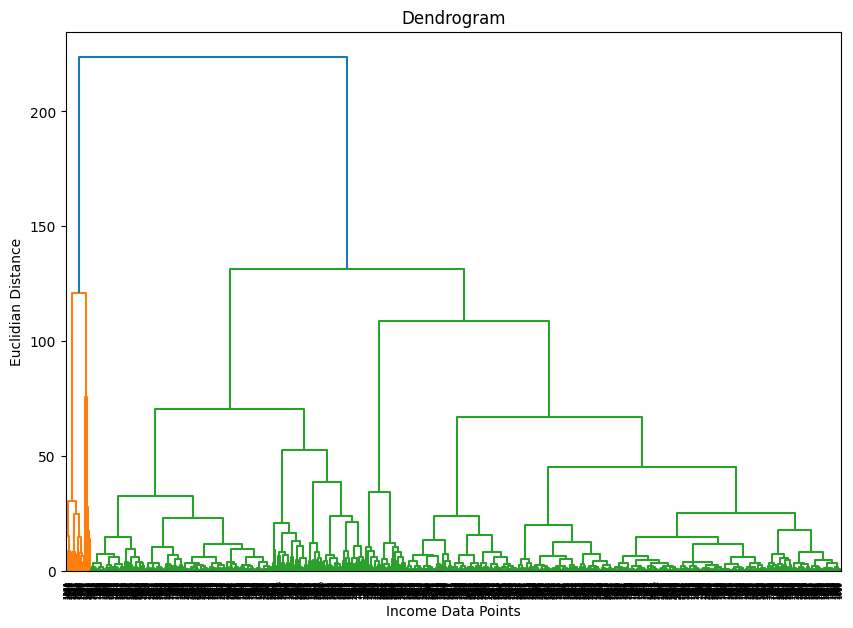

In [128]:
# Initialze dendrogram
plt.figure(figsize =(10, 7))
plt.title('Dendrogram')
plt.xlabel('Income Data Points')
plt.ylabel('Euclidian Distance')
Dendrogram = shc.dendrogram((shc.linkage(X_train3, method ='ward')))


From the above graph, the leftmost blue line is longest. If a horizontal line were drawn, it would be intersecting 1 other line, for a total of 2. So, 2 will be the number of clusters used for Agglomerative clustering. To show:

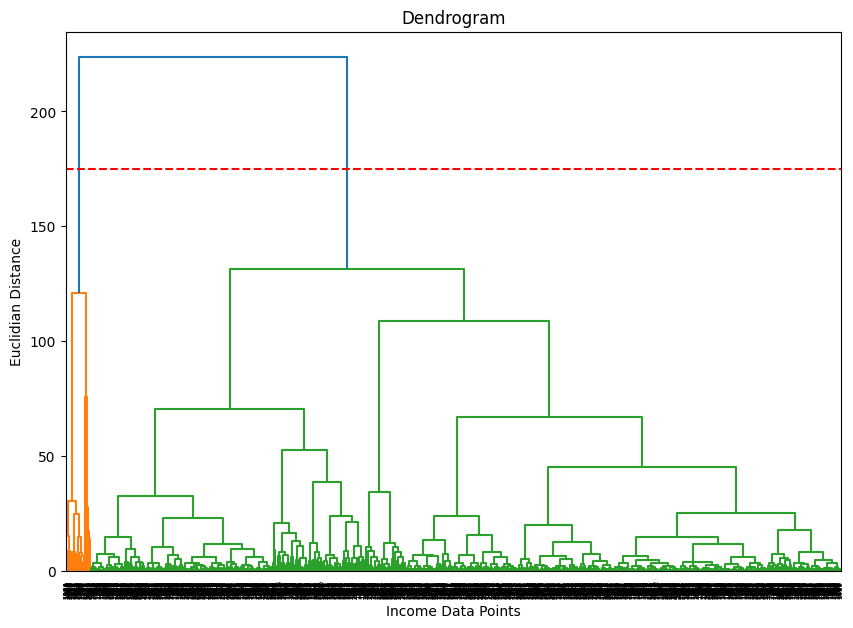

In [129]:
# Initialze dendrogram again
plt.figure(figsize =(10, 7))
plt.title('Dendrogram')
plt.xlabel('Income Data Points')
plt.ylabel('Euclidian Distance')
Dendrogram = shc.dendrogram((shc.linkage(X_train3, method ='ward')))
plt.axhline(y=175, color='r', linestyle='--')


Next, the Agglomerative Clustering is intialized with a value of 2, and a 'ward' linkage.

In [130]:
# Looks like the longest line is 2
cluster = AgglomerativeClustering(n_clusters=2, linkage = 'ward')
cluster.fit_predict(X_train3)

array([0, 0, 0, ..., 0, 0, 0])

In [131]:
# save values in cl variable
cl = cluster.fit_predict(X_train3)

In [132]:
# Display silhouette score
silhouette_score(X_train3, cl)

0.760723528155115

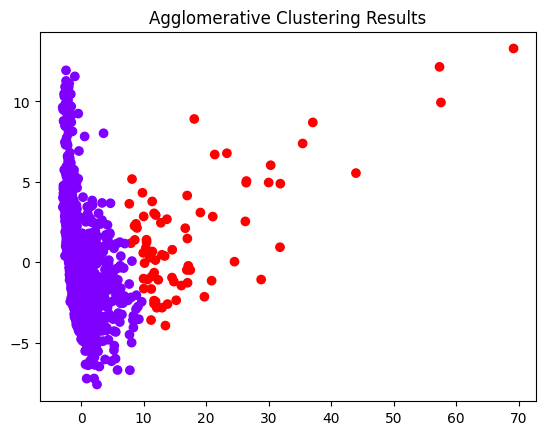

In [134]:
# Display Clustering results
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=cl, cmap='rainbow')
plt.title('Agglomerative Clustering Results')
plt.show()

The dendrogram results have a much lower cluster number than the KMeans results above. The dendrogram suggests that a lower cluster is better for the data, and the silhouette plots above suggest a higher value. The data shape is still roughly the same however. It matches some of the 2D PCA graphs from earlier.

Finally, to try DBSCAN on the census data. Since the elbow plot

In [245]:
# Initialize DBSCAN with a standard eps of 0.5, min_sample of 200
db = DBSCAN(eps = 0.52, min_samples = 10)


In [246]:
# fit to the training data
clusters = db.fit_predict(X_train3)

In [247]:
db.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [248]:
#print clusters
print(clusters)

[0 0 0 ... 0 0 0]


In [249]:
# Now the graph, starting with saving the labels and noise
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 623


In [251]:
# Print silhouette score
print('The silhouette score for the DBSCAN data is:', silhouette_score(X_train3, clusters))

The silhouette score for the DBSCAN data is: -0.03069680487532723


That score indicates a high degree of overlap, which is expected given the low cluster number and unusual number of tries it took to figure out the eps value. It also indicates a somewhat poor fit, indicating that the Silhouette chart and Dendrogram were better options for fitting the census data.

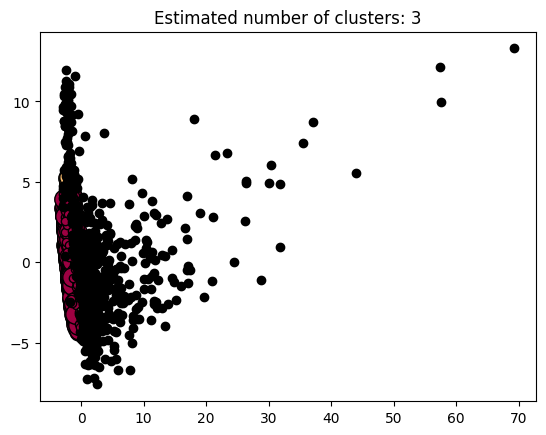

In [256]:
# Plot the DBSCAN
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_train3[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_train3[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [259]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

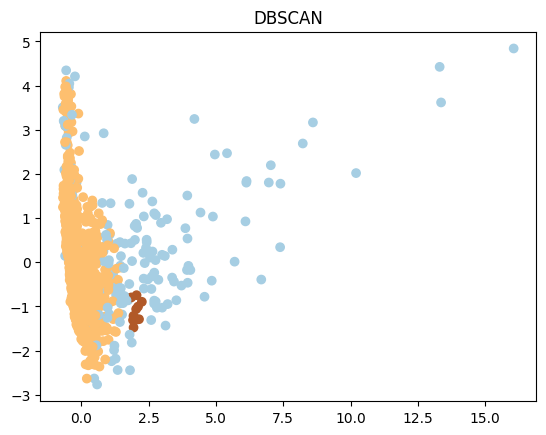

In [260]:
dbscan(X_train3, eps=0.52, min_samples = 10)

Yes, this graph shows a very, very high degree of noise. I did many different minimum_sample values, and epsilon values, so it's likely that the DBSCAN method isn't a good fit for the pattern of my data, or the implementation requires more refinement than I'm currently capable of at the moment. Either way, the silhouette score method seems to work best out of the three methods I tried today. It had the most consistent results across multiple N values, it graphed clearly, and each cluster was clearly labeled, with fairly clear borders between each cluster. The dendrogram method only created 2 clusters, atlhough they were fairly clear, and was easy to understand.

I anticipated the low performance of DBSCAN due to the low min_samples number required to get more than one cluster, which indicated a poor perforance in such a large dataframe.

So, in conclusion: the silhouette plot K-Means method worked best, Hierarchical clustering was second, and DBSCAN was third.

In [261]:
# Now to get the plotly graphs in html form
fig1.write_html('KMeans 2.html')

In [262]:
fig2.write_html('Kmeans 3.html')

In [263]:
fig3.write_html('Kmeans 4.html')

In [264]:
fig4.write_html('Kmeans 5.html')

In [265]:
fig5.write_html('Kmeans 6.html')

In [266]:
fig6.write_html('Kmeans 7.html')

In [267]:
fig_o.write_html('Kmeans Original.html')